In [47]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.append("/home/pat/terliuk/software/DARWIN/DecayFitter/")

In [48]:
%matplotlib inline
plt.rcParams['figure.figsize']=[15.0,12.0]
plt.rcParams['axes.linewidth']=1
plt.rcParams['xtick.major.size']=6
plt.rcParams['xtick.major.width']=1
plt.rcParams['xtick.minor.size']=4
plt.rcParams['xtick.minor.width']=1
plt.rcParams['ytick.major.size']=6
plt.rcParams['ytick.major.width']=1
plt.rcParams['ytick.minor.size']=4
plt.rcParams['ytick.minor.width']=1
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['axes.labelsize'] =24
plt.rcParams['legend.fontsize']= 24
plt.rcParams['legend.framealpha'] = 0.95
plt.rcParams['legend.handlelength']=2.0
plt.rcParams['figure.facecolor']="w"
plt.rcParams['xtick.direction']= 'in'
plt.rcParams['ytick.direction']= 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

In [49]:
from AnalyticCalculator import AnalyticCalculator

In [60]:
bin_edges = np.linspace(2200, 2800, 31)
#bin_edges = np.linspace(2435, 2481, 2)
ltime = 10.
calc = AnalyticCalculator(bin_edges, 
                         livetime=ltime, 
                         )

In [61]:
## for 5 tons
Scale_8B    =  2.36e-4
Scale_222Rn =  3.14e-4
Scale_137Xe =  1.42e-3
###
Scale_214Bi = 9.278e-02
Scale_208Tl = 2.339e+00
Scale_44Sc  = Scale_208Tl/100.

T12_136Xe_2vbb =  2.165

In [62]:

components = calc.getBinnedComponents(Scale214Bi = Scale_214Bi, 
                                      Scale208Tl = Scale_208Tl,
                                      Scale44Sc  = Scale_44Sc,
                                      Scale8B = Scale_8B, 
                                      Scale222Rn = Scale_222Rn,
                                      Scale137Xe = Scale_137Xe,
                                      T12_136Xe_2vbb  = T12_136Xe_2vbb , 
                                      AXe136 = 0.28157)


##
xvals = np.linspace(2200, 2800, 1001)
yvals_214Bi = calc.spectrum_214Bi_noscale(xvals)
yvals_208Tl = calc.spectrum_208Tl_noscale(xvals)
yvals_44Sc  = calc.spectrum_44Sc_noscale(xvals)
yvals_222Rn = calc.spectrum_222Rn(xvals)
yvals_8B = calc.spectrum_8B(xvals)
yvals_137Xe = calc.spectrum_137Xe(xvals)
yvals_136Xe_2vbb =  calc.spectrum_136Xe_2vbb(xvals)
yvals_136Xe_0vbb =  calc.spectrum_136Xe_0vbb(xvals)

###
total_rate_signal = np.zeros_like(components['214Bi'])
for key in components.keys():
    total_rate_signal+=components[key]
components['total_rate_signal']= total_rate_signal
components['total_materials'] = (components['208Tl'] + components['214Bi'] +components['44Sc'] )


scale_per_kev_t_y=1./calc.livetime/calc.fidMass/(bin_edges[1:] - bin_edges[0:-1])

In [63]:
for key in components.keys():
    print(key.ljust(20), np.sum(components[key])/calc.livetime/calc.fidMass/(bin_edges[-1] -  bin_edges[0]), " ev / t / y / keV" )

137Xe                0.0013659840000000004  ev / t / y / keV
222Rn                0.00029627600000000005  ev / t / y / keV
8B                   0.00023600000000000002  ev / t / y / keV
136Xe_2vbb           0.019745231172905643  ev / t / y / keV
214Bi                0.0005130386859081271  ev / t / y / keV
44Sc                 4.5684222124280346e-05  ev / t / y / keV
208Tl                0.004489892262757318  ev / t / y / keV
136Xe_0vbb           0.000422355  ev / t / y / keV
total_rate_signal    0.02711446134369537  ev / t / y / keV
total_materials      0.005048615170789727  ev / t / y / keV


In [64]:

expect = calc.getBinnedExpectation(Scale214Bi = Scale_214Bi, 
                                      Scale208Tl = Scale_208Tl,
                                      Scale44Sc  = Scale_44Sc,
                                      Scale8B = Scale_8B, 
                                      Scale222Rn = Scale_222Rn,
                                      Scale137Xe = Scale_137Xe,
                                      AXe136 = 0.0, 
                                      T12_136Xe_2vbb =T12_136Xe_2vbb )

Text(0, 0.5, 'Rate [ events / year / ton / keV ]')

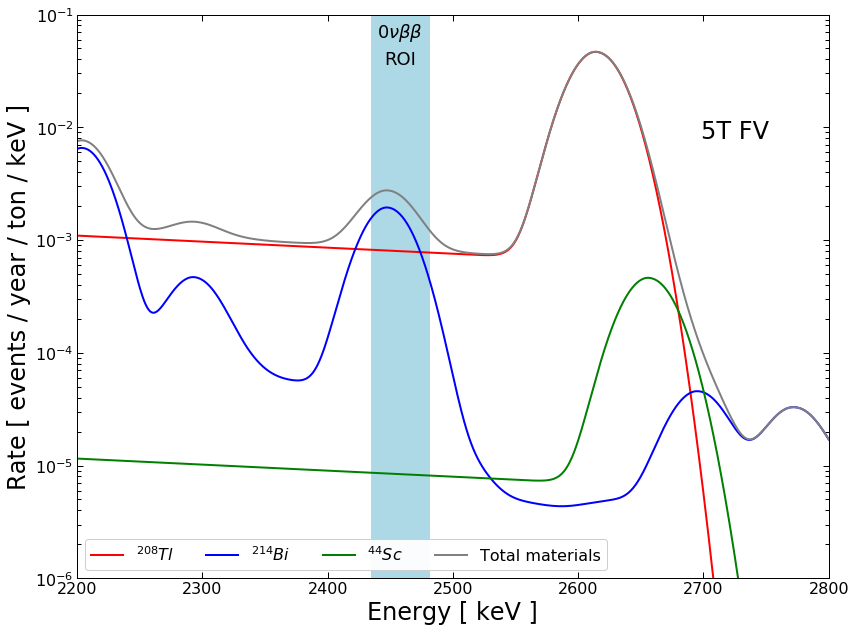

In [65]:
fig = plt.figure(figsize=(12,9), facecolor="w")
ax_main = fig.add_axes([0.08,0.08,0.87,0.87])
tot_materials = yvals_214Bi*Scale_214Bi + yvals_208Tl*Scale_208Tl + yvals_44Sc*Scale_44Sc

tot_materials = yvals_214Bi*Scale_214Bi + yvals_208Tl*Scale_208Tl + yvals_44Sc*Scale_44Sc


ax_main.plot(xvals, yvals_208Tl*Scale_208Tl, color = "r", lw=2, label = "${}^{208}Tl$")
ax_main.plot(xvals, yvals_214Bi*Scale_214Bi, color = "b", lw=2, label = "${}^{214}Bi$")
ax_main.plot(xvals, yvals_44Sc*Scale_44Sc, color = "g", lw=2, label = "${}^{44}Sc$")


ax_main.plot(xvals, tot_materials, color = "0.5", lw=2, label = "Total materials")

ax_main.text(2457.8, 7e-2, r"$0 \nu \beta \beta$", va = "center", ha = "center", fontsize = 18)
ax_main.text(2457.8, 4e-2, r"ROI", va = "center", ha = "center", fontsize = 18)

ax_main.legend(fontsize=16, ncol=4)
ax_main.text(0.83,0.78, "%iT FV"%calc.fidMass, 
            transform=ax_main.transAxes, fontsize = 24)
ax_main.fill_betweenx([1e-6, 10],[2435, 2435], [2481., 2481], color ="lightblue")
ax_main.set_yscale("log")
ax_main.set_xlim(2200, 2800)
ax_main.set_ylim(1e-6, 0.1)
ax_main.set_xlabel("Energy [ keV ]")
ax_main.set_ylabel("Rate [ events / year / ton / keV ]")

Text(0, 0.5, 'Rate [ events / year / ton / keV ]')

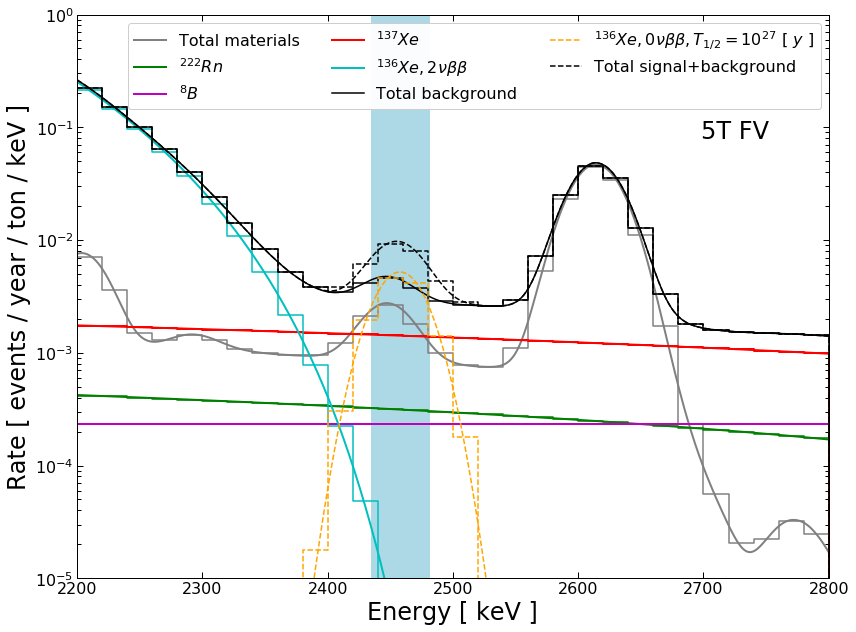

In [66]:
fig = plt.figure(figsize=(12,9), facecolor="w")
ax_main = fig.add_axes([0.08,0.08,0.87,0.87])
tot_materials = yvals_214Bi*Scale_214Bi + yvals_208Tl*Scale_208Tl + yvals_44Sc*Scale_44Sc

tot_materials = yvals_214Bi*Scale_214Bi + yvals_208Tl*Scale_208Tl + yvals_44Sc*Scale_44Sc

ax_main.plot(xvals, tot_materials, color = "0.5", lw=2, label = "Total materials")
plt.step(bin_edges, np.append(components['total_materials']*scale_per_kev_t_y, 
                              [0]), where = "post", c ="0.5")

ax_main.plot(xvals, yvals_222Rn, color = "g", lw=2, label = r"${}^{222}Rn$")
plt.step(bin_edges, np.append(components['222Rn']*scale_per_kev_t_y, 
                              [0]), where = "post", c ="g")
ax_main.plot(xvals, yvals_8B, color = "m", lw=2, label = r"${}^{8}B$")
plt.step(bin_edges, np.append(components['8B']*scale_per_kev_t_y, 
                              [0]), where = "post", c ="m")

ax_main.plot(xvals, yvals_137Xe, color = "r", lw=2, label = r"${}^{137}Xe$")
plt.step(bin_edges, np.append(components['137Xe']*scale_per_kev_t_y, 
                              [0]), where = "post", c ="r", lw=2)

ax_main.plot(xvals, yvals_136Xe_2vbb, color="c", lw=2, label = r"${}^{136}Xe, 2\nu\beta\beta$")

plt.step(bin_edges, np.append(components['136Xe_2vbb']*scale_per_kev_t_y, 
                              [0]), where = "post", c ="c")

total_rate = tot_materials + yvals_222Rn+yvals_8B+yvals_137Xe+yvals_136Xe_2vbb
plt.plot(xvals, total_rate, c="k", label = "Total background")
plt.step(bin_edges, np.append(expect*scale_per_kev_t_y, [0]), where = "post", c = "k")

####
plt.plot(xvals, (yvals_136Xe_0vbb), c="orange", label = r"${}^{136}Xe, 0\nu\beta\beta, T_{1/2} = 10^{27}\ [\ y \ ]$", ls="--")

plt.step(bin_edges, np.append(components['136Xe_0vbb']*scale_per_kev_t_y, [0]), where = "post", c = "orange", ls="--")


####
plt.plot(xvals, (total_rate+yvals_136Xe_0vbb), c="k", ls ="--", label = "Total signal+background")
plt.step(bin_edges, np.append(components['total_rate_signal']*scale_per_kev_t_y, [0]), where = "post", c = "k", ls="--")
###

ax_main.legend(fontsize=16, ncol=3)
ax_main.text(0.83,0.78, "%iT FV"%calc.fidMass, 
            transform=ax_main.transAxes, fontsize = 24)
ax_main.fill_betweenx([1e-6, 10],[2435, 2435], [2481., 2481], color ="lightblue")
ax_main.set_yscale("log")
ax_main.set_xlim(2200, 2800)
ax_main.set_ylim(1e-5, 1)
ax_main.set_xlabel("Energy [ keV ]")
ax_main.set_ylabel("Rate [ events / year / ton / keV ]")

Text(0, 0.5, 'Events in 10 years')

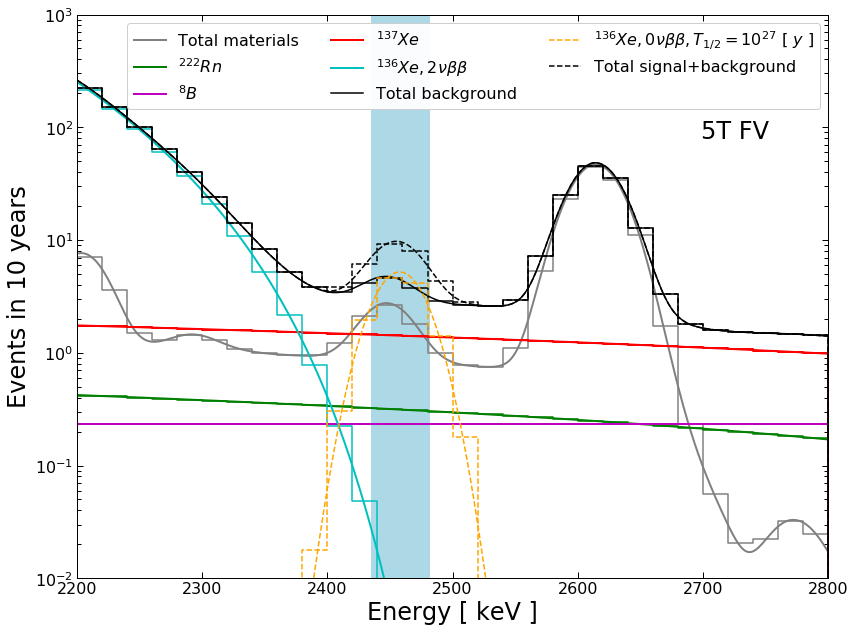

In [67]:
rate_scale = calc.fidMass*calc.livetime*(bin_edges[1] - bin_edges[0])
fig = plt.figure(figsize=(12,9), facecolor="w")
ax_main = fig.add_axes([0.08,0.08,0.87,0.87])
tot_materials = yvals_214Bi*Scale_214Bi + yvals_208Tl*Scale_208Tl + yvals_44Sc*Scale_44Sc
ax_main.plot(xvals, tot_materials*rate_scale, color = "0.5", lw=2, label = "Total materials")
plt.step(bin_edges, np.append(components['total_materials'], 
                              [0]), where = "post", c ="0.5")

ax_main.plot(xvals, yvals_222Rn*rate_scale, color = "g", lw=2, label = r"${}^{222}Rn$")
plt.step(bin_edges, np.append(components['222Rn'], 
                              [0]), where = "post", c ="g")
ax_main.plot(xvals, yvals_8B*rate_scale, color = "m", lw=2, label = r"${}^{8}B$")
plt.step(bin_edges, np.append(components['8B'], 
                              [0]), where = "post", c ="m")

ax_main.plot(xvals, yvals_137Xe*rate_scale, color = "r", lw=2, label = r"${}^{137}Xe$")
plt.step(bin_edges, np.append(components['137Xe'], 
                              [0]), where = "post", c ="r", lw=2)

ax_main.plot(xvals, yvals_136Xe_2vbb*rate_scale, color="c", lw=2, label = r"${}^{136}Xe, 2\nu\beta\beta$")

plt.step(bin_edges, np.append(components['136Xe_2vbb'], 
                              [0]), where = "post", c ="c")

total_rate = tot_materials + yvals_222Rn+yvals_8B+yvals_137Xe+yvals_136Xe_2vbb
plt.plot(xvals, total_rate*rate_scale, c="k", label = "Total background")
plt.step(bin_edges, np.append(expect, [0]), where = "post", c = "k")

####
plt.plot(xvals, (yvals_136Xe_0vbb)*rate_scale, 
         c="orange", label = r"${}^{136}Xe, 0\nu\beta\beta, T_{1/2} = 10^{27}\ [\ y \ ]$", ls="--")

plt.step(bin_edges, np.append(components['136Xe_0vbb'], [0]), where = "post", c = "orange", ls="--")


####
plt.plot(xvals, (total_rate+yvals_136Xe_0vbb)*rate_scale,
         c="k", ls ="--", label = "Total signal+background")
plt.step(bin_edges, np.append(components['total_rate_signal'], [0]), where = "post", c = "k", ls="--")
###

ax_main.legend(fontsize=16, ncol=3)
ax_main.fill_betweenx([1e-6, 10000],[2435, 2435], [2481., 2481], color ="lightblue")
ax_main.set_yscale("log")
ax_main.set_xlim(2200, 2800)
ax_main.set_ylim(1e-2, 1000)
ax_main.text(0.83,0.78, "%iT FV"%calc.fidMass, 
            transform=ax_main.transAxes, fontsize = 24)
ax_main.set_xlabel("Energy [ keV ]")
ax_main.set_ylabel("Events in %i years"%ltime)